In [27]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from PIL import Image
import requests
import random
from sklearn.metrics.pairwise import cosine_similarity
import io
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

In [28]:
books = pd.read_csv('/content/drive/MyDrive/2023-2/KHUDA/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/2023-2/KHUDA/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/2023-2/KHUDA/Users.csv')

# Îç∞Ïù¥ÌÑ∞ EDA & Ï†ÑÏ≤òÎ¶¨

In [29]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [30]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [31]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [32]:
# ÌõÑÏóê ÎÇòÏò¨ user_book_score() Ìï®ÏàòÏùò Íµ¨ÌòÑÏùÑ ÏúÑÌï¥ book_value ÎùºÎäî ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
book_value = books.drop_duplicates(['Book-Title']) # books Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Ïú†ÎãàÌÅ¨Ìïú Ï±Ö Ï†úÎ™©Îßå ÎÇ®Í∏∞Í∏∞
book_value['Book-ID'] = book_value.index # Book-ID ÎùºÎäî ÏÉàÎ°úÏö¥ Ïó¥ÏùÑ ÎßåÎì§Í≥† Ïú†ÎãàÌÅ¨Ìïú Ï±ÖÎßàÎã§ 0~271359Î≤àÌò∏Î•º ÏàúÏÑúÎåÄÎ°ú Îß§Í∏∞Í∏∞
book_value.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  Book-ID  
0  http://images.amazon.com/images/P/0195153448.0...        0  
1  http://images.amazon.com/images/P/0002005018.0...        1  
2  http://images.amazon.com/images/P/0060973129.0...        2  
3  http://images.amazon.com/images/P/0374157065.0...        3  
4  http://images.amazon.com/images/P/0393045218.0...        4

In [33]:
# book_valueÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïó¥Îßå Ï∂îÏ∂ú
book_value = book_value.loc[:,['Book-Title', 'Book-ID']]
book_value

Book-Title  Book-ID
0                                     Classical Mythology        0
1                                            Clara Callan        1
2                                    Decision in Normandy        2
3       Flu: The Story of the Great Influenza Pandemic...        3
4                                  The Mummies of Urumchi        4
...                                                   ...      ...
271354      Flashpoints: Promise and Peril in a New World   271354
271356                            From One to One Hundred   271356
271357  Lily Dale : The True Story of the Town that Ta...   271357
271358                        Republic (World's Classics)   271358
271359  A Guided Tour of Rene Descartes' Meditations o...   271359

[242135 rows x 2 columns]

In [34]:
# booksÎ•º Í∏∞Ï§ÄÏúºÎ°ú ratings Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÍµêÏßëÌï©ÏùÑ ÌÜµÌï¥ Ï°∞Ïù∏(keyÍ∞í: ISBN)
books_data = books.merge(ratings, how='left', on='ISBN')
books_data.head()

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   
3  http://images.amazon.com/images/P/0002005018.0...   
4  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...      2.0          0.0  
1  http://images.amazon.com/images/P/0002005018.0...      8.0          5.0  
2  http://images.amazon.com/images/P/0002005018.0...  11400.0          0.0  
3  http://images.amazon.com/images/P/0002005018.0...  11676.0          8.0  
4  http://images.amazon.com/images/P/0002005018.0...  41385.0          0.0

In [35]:
# booksÎ•º Í∏∞Ï§ÄÏúºÎ°ú ratings Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÍµêÏßëÌï©ÏùÑ ÌÜµÌï¥ Ï°∞Ïù∏(keyÍ∞í: ISBN)
df = books.merge(ratings, how='left', on='ISBN')
df

ISBN                                         Book-Title  \
0        0195153448                                Classical Mythology   
1        0002005018                                       Clara Callan   
2        0002005018                                       Clara Callan   
3        0002005018                                       Clara Callan   
4        0002005018                                       Clara Callan   
...             ...                                                ...   
1032340  0440400988                         There's a Bat in Bunk Five   
1032341  0525447644                            From One to One Hundred   
1032342  006008667X  Lily Dale : The True Story of the Town that Ta...   
1032343  0192126040                        Republic (World's Classics)   
1032344  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                  Book-Author Year-Of-Publication  \
0          Mark P. O. Morford                2002   
1        Richard Bruce Wright                2001   
2        Richard Bruce Wright                2001   
3        Richard Bruce Wright                2001   
4        Richard Bruce Wright                2001   
...                       ...                 ...   
1032340        Paula Danziger                1988   
1032341            Teri Sloat                1991   
1032342      Christine Wicker                2004   
1032343                 Plato                1996   
1032344   Christopher  Biffle                2000   

                                                Publisher  \
0                                 Oxford University Press   
1                                   HarperFlamingo Canada   
2                                   HarperFlamingo Canada   
3                                   HarperFlamingo Canada   
4                                   HarperFlamingo Canada   
...                                                   ...   
1032340                   Random House Childrens Pub (Mm)   
1032341                                      Dutton Books   
1032342                                HarperSanFrancisco   
1032343                           Oxford University Press   
1032344  McGraw-Hill Humanities/Social Sciences/Languages   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/0195153448.0...   
1        http://images.amazon.com/images/P/0002005018.0...   
2        http://images.amazon.com/images/P/0002005018.0...   
3        http://images.amazon.com/images/P/0002005018.0...   
4        http://images.amazon.com/images/P/0002005018.0...   
...                                                    ...   
1032340  http://images.amazon.com/images/P/0440400988.0...   
1032341  http://images.amazon.com/images/P/0525447644.0...   
1032342  http://images.amazon.com/images/P/006008667X.0...   
1032343  http://images.amazon.com/images/P/0192126040.0...   
1032344  http://images.amazon.com/images/P/0767409752.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/0195153448.0...   
1        http://images.amazon.com/images/P/0002005018.0...   
2        http://images.amazon.com/images/P/0002005018.0...   
3        http://images.amazon.com/images/P/0002005018.0...   
4        http://images.amazon.com/images/P/0002005018.0...   
...                                                    ...   
1032340  http://images.amazon.com/images/P/0440400988.0...   
1032341  http://images.amazon.com/images/P/0525447644.0...   
1032342  http://images.amazon.com/images/P/006008667X.0...   
1032343  http://images.amazon.com/images/P/0192126040.0...   
1032344  http://images.amazon.com/images/P/0767409752.0...   

                                               Image-URL-L   User-ID  \
0        http://images.amazon.com/images/P/0195153448.0...       2.0   
1        http://images.amazon.com/images/P/0002005018.0...       8.0   
2        http://images.amazon.com/images/P/0002005

In [36]:
# dfÎ•º Í∏∞Ï§ÄÏúºÎ°ú book_value Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÍµêÏßëÌï©ÏùÑ ÌÜµÌï¥ Ï°∞Ïù∏(key: Book-Title)
df = pd.merge(df, book_value, how='left', on='Book-Title')
df

ISBN                                         Book-Title  \
0        0195153448                                Classical Mythology   
1        0002005018                                       Clara Callan   
2        0002005018                                       Clara Callan   
3        0002005018                                       Clara Callan   
4        0002005018                                       Clara Callan   
...             ...                                                ...   
1032340  0440400988                         There's a Bat in Bunk Five   
1032341  0525447644                            From One to One Hundred   
1032342  006008667X  Lily Dale : The True Story of the Town that Ta...   
1032343  0192126040                        Republic (World's Classics)   
1032344  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                  Book-Author Year-Of-Publication  \
0          Mark P. O. Morford                2002   
1        Richard Bruce Wright                2001   
2        Richard Bruce Wright                2001   
3        Richard Bruce Wright                2001   
4        Richard Bruce Wright                2001   
...                       ...                 ...   
1032340        Paula Danziger                1988   
1032341            Teri Sloat                1991   
1032342      Christine Wicker                2004   
1032343                 Plato                1996   
1032344   Christopher  Biffle                2000   

                                                Publisher  \
0                                 Oxford University Press   
1                                   HarperFlamingo Canada   
2                                   HarperFlamingo Canada   
3                                   HarperFlamingo Canada   
4                                   HarperFlamingo Canada   
...                                                   ...   
1032340                   Random House Childrens Pub (Mm)   
1032341                                      Dutton Books   
1032342                                HarperSanFrancisco   
1032343                           Oxford University Press   
1032344  McGraw-Hill Humanities/Social Sciences/Languages   

                                               Image-URL-S  \
0        http://images.amazon.com/images/P/0195153448.0...   
1        http://images.amazon.com/images/P/0002005018.0...   
2        http://images.amazon.com/images/P/0002005018.0...   
3        http://images.amazon.com/images/P/0002005018.0...   
4        http://images.amazon.com/images/P/0002005018.0...   
...                                                    ...   
1032340  http://images.amazon.com/images/P/0440400988.0...   
1032341  http://images.amazon.com/images/P/0525447644.0...   
1032342  http://images.amazon.com/images/P/006008667X.0...   
1032343  http://images.amazon.com/images/P/0192126040.0...   
1032344  http://images.amazon.com/images/P/0767409752.0...   

                                               Image-URL-M  \
0        http://images.amazon.com/images/P/0195153448.0...   
1        http://images.amazon.com/images/P/0002005018.0...   
2        http://images.amazon.com/images/P/0002005018.0...   
3        http://images.amazon.com/images/P/0002005018.0...   
4        http://images.amazon.com/images/P/0002005018.0...   
...                                                    ...   
1032340  http://images.amazon.com/images/P/0440400988.0...   
1032341  http://images.amazon.com/images/P/0525447644.0...   
1032342  http://images.amazon.com/images/P/006008667X.0...   
1032343  http://images.amazon.com/images/P/0192126040.0...   
1032344  http://images.amazon.com/images/P/0767409752.0...   

                                               Image-URL-L   User-ID  \
0        http://images.amazon.com/images/P/0195153448.0...       2.0   
1        http://images.amazon.com/images/P/0002005018.0...       8.0   
2        http://images.amazon.com/images/P/0002005

In [37]:
df.shape

(1032345, 11)

In [38]:
# df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï°¥Ïû¨ÌïòÎäî Í≤∞Ï∏°Í∞í ÌôïÏù∏
df.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication       0
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               4
User-ID                1209
Book-Rating            1209
Book-ID                   0
dtype: int64

In [39]:
df[df['Book-Rating'].isnull()]

#Usef-IDÏôÄ Book-RatingÏù¥ ÎèôÏãúÏóê missing valueÎùºÎäîÍ±∏ Ïïå Ïàò ÏûàÏùå
#ÌïòÏßÄÎßå user-based CFÏóêÏÑúÎäî User-IDÏôÄ Book-Rating Î™®Îëê ÌïÑÏöîÌï®
#Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌïÑÏöî

ISBN                                         Book-Title  \
65244    044990671X                                      Bronze Mirror   
65253    0929587081                                   Men and Brethren   
65254    155970117X                                 My Father, His Son   
65255    0688105408             Starlings Laughing: A Memoir of Africa   
124362   0671568485                           The STAR TREK THE RETURN   
...             ...                                                ...   
1032326  1874166633  Introducing Nietzsche (Foundations in Children...   
1032327  0130897930                 Core Web Programming (2nd Edition)   
1032328  020130998X  The Unified Modeling Language Reference Manual...   
1032329  2268032019            Petite histoire de la d√É?√Ç¬©sinformation   
1032332  3442150663                                        Der Mossad.   

                 Book-Author Year-Of-Publication                    Publisher  \
65244          Jeanne Larsen                1992             Ballantine Books   
65253    James Gould Cozzens                1989          Elephant Paperbacks   
65254         Reidar Jonsson                1991        Little Brown &amp; Co   
65255     June Vendall Clark                1991                Harpercollins   
124362       William Shatner                1996                   Audioworks   
...                      ...                 ...                          ...   
1032326        Laurence Gane                1998            Natl Book Network   
1032327           Marty Hall                2001            Prentice Hall PTR   
1032328       James Rumbaugh                1998  Addison-Wesley Professional   
1032329     Vladimir Volkoff                1999           Editions du Rocher   
1032332     Victor Ostrovsky                2000                     Goldmann   

                                               Image-URL-S  \
65244    http://images.amazon.com/images/P/044990671X.0...   
65253    http://images.amazon.com/images/P/0929587081.0...   
65254    http://images.amazon.com/images/P/155970117X.0...   
65255    http://images.amazon.com/images/P/0688105408.0...   
124362   http://images.amazon.com/images/P/0671568485.0...   
...                                                    ...   
1032326  http://images.amazon.com/images/P/1874166633.0...   
1032327  http://images.amazon.com/images/P/0130897930.0...   
1032328  http://images.amazon.com/images/P/020130998X.0...   
1032329  http://images.amazon.com/images/P/2268032019.0...   
1032332  http://images.amazon.com/images/P/3442150663.0...   

                                               Image-URL-M  \
65244    http://images.amazon.com/images/P/044990671X.0...   
65253    http://images.amazon.com/images/P/0929587081.0...   
65254    http://images.amazon.com/images/P/155970117X.0...   
65255    http://images.amazon.com/images/P/0688105408.0...   
124362   http://images.amazon.com/images/P/0671568485.0...   
...                                                    ...   
1032326  http://images.amazon.com/images/P/1874166633.0...   
1032327  http://images.amazon.com/images/P/0130897930.0...   
1032328  http://images.amazon.com/images/P/020130998X.0...   
1032329  http://images.amazon.com/images/P/2268032019.0...   
1032332  http://images.amazon.com/images/P/3442150663.0...   

                                               Image-URL-L  User-ID  \
65244    http://images.amazon.com/images/P/044990671X.0...      NaN   
65253    http://images.amazon.com/images/P/0929587081.0...      NaN   
65254    http://images.amazon.com/images/P/155970117X.0...      NaN   
65255    http://images.amazon.com/images/P/0688105408.0...      NaN   
124362   http://images.amazon.com/images/P/0671568485.0...      NaN   
...                                                    ...      ...   
1032326  http://images.amazon.com/images/P/1874166633.0...      NaN   
1032327  http://images.amazon.com/images/P/0130897930.0...      NaN   
1032328  http://image

In [40]:
#Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú ÌñâÎì§ Ï†úÍ±∞
df = df.dropna(subset=['Book-Rating', 'User-ID', 'Book-Author', 'Publisher','Image-URL-L'])

df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Book-ID                0
dtype: int64

In [41]:
#ÌèâÏ†êÎ≥Ñ Ï±Ö Í∞úÏàò ÌååÏïÖ

df['Book-Rating'].value_counts()

0.0     647291
8.0      91803
10.0     71225
7.0      66401
9.0      60776
5.0      45355
6.0      31687
4.0       7617
3.0       5118
2.0       2375
1.0       1481
Name: Book-Rating, dtype: int64

In [42]:
#Î≥ÑÏ†êÏù¥ 0Ïù∏Í±¥ ÌèâÏ†êÏùÑ ÎÇ®Í∏∞ÏßÄ ÏïäÎäî Í≤ÉÏù¥Îãà ÏÇ≠Ï†ú
df = df[df['Book-Rating'] > 0]
df['Book-Rating'].value_counts()

8.0     91803
10.0    71225
7.0     66401
9.0     60776
5.0     45355
6.0     31687
4.0      7617
3.0      5118
2.0      2375
1.0      1481
Name: Book-Rating, dtype: int64

In [43]:
# Ï±ÖÎßàÎã§ Îß§Í≤®ÏßÑ ÌèâÏ†ê Í∞úÏàò ÌååÏïÖ
df["Book-Title"].value_counts()

#ÌïúÍ∞úÎßå ÏûàÎäî Ï±ÖÎèÑ ÏûàÎã§! Í∑ºÎç∞ Ïù¥Í±¥ Ïö∞Î¶¨Í∞Ä ÎßåÎì§ Î™®Îç∏ÏóêÎäî Ïì∏Î™®Í∞Ä ÏóÜÏùå

The Lovely Bones: A Novel                 707
Wild Animus                               581
The Da Vinci Code                         494
The Secret Life of Bees                   406
The Nanny Diaries: A Novel                393
                                         ... 
Jedi Quest - Path to Truth (Star Wars)      1
Walter's Purple Heart                       1
Trapped Fear Street 51                      1
Heather Takes the Reins                     1
From One to One Hundred                     1
Name: Book-Title, Length: 135564, dtype: int64

In [44]:
rating_counts = pd.DataFrame(df["Book-Title"].value_counts())

#ÌèâÏ†êÏù¥ 100Í∞ú Ïù¥ÌïòÎ°ú ÏûàÎäî Ï±ÖÎì§ÏùÄ ÏÇ≠Ï†úÌïòÏûê!
rare_books = rating_counts[rating_counts['Book-Title'] < 100].index
common_books = df[~df['Book-Title'].isin(rare_books)]

common_books['Book-Title'].value_counts()

The Lovely Bones: A Novel     707
Wild Animus                   581
The Da Vinci Code             494
The Secret Life of Bees       406
The Nanny Diaries: A Novel    393
                             ... 
Congo                         100
Deception Point               100
Daddy's Little Girl           100
Cause of Death                100
Disclosure                    100
Name: Book-Title, Length: 200, dtype: int64

In [45]:
#Ïú†Ï†ÄÍ∞Ä ÎÇ®Í∏¥ ÌèâÏ†ê Í∞úÏàò ÌååÏïÖ
common_books["User-ID"].value_counts()

#ÌïúÍ∞úÎßå ÎÇ®Í∏¥ ÏÇ¨ÎûåÎèÑ ÏûàÍµ∞.. Ïù¥Îü∞ ÏÇ¨ÎûåÏùÄ ÏÇ¨Ïö©Îê† Ïàò ÏóÜÏúºÎãà ÏóÜÏï†Ïûê!

11676.0     225
16795.0      81
95359.0      61
60244.0      46
240567.0     42
           ... 
239067.0      1
239468.0      1
242643.0      1
248677.0      1
169893.0      1
Name: User-ID, Length: 16665, dtype: int64

In [46]:
#Ï±Ö ÌèâÏ†êÏùÑ 10Í∞ú Ïù¥ÌïòÎ°ú ÎÇ®Í∏¥ ÏÇ¨ÎûåÏùÑ ÎìúÎûçÌïòÏûê
common_books = common_books[common_books["User-ID"].map(common_books["User-ID"].value_counts()) >= 10]

common_books["User-ID"].value_counts()

11676.0     225
16795.0      81
95359.0      61
60244.0      46
240567.0     42
           ... 
232106.0     10
104113.0     10
78834.0      10
74286.0      10
208671.0     10
Name: User-ID, Length: 434, dtype: int64

In [47]:
# ÌñâÏùò Í∞úÏàòÍ∞Ä 1032345 -> 6852 Î°ú Í∞êÏÜå
common_books.shape

(6852, 11)

# User-based Collaborative Filtering

In [48]:
# common_booksÎ•º train_setÍ≥º test_setÏúºÎ°ú ÎÇòÎàÑÍ∏∞ (User-IDÍ∞Ä Í∑†Îì±ÌïòÍ≤å Î∂ÑÌè¨ÌïòÎèÑÎ°ù ÏÑ§Ï†ï)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(common_books, stratify=common_books["User-ID"], random_state=42)

In [49]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5139 entries, 180628 to 27832
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 5139 non-null   object 
 1   Book-Title           5139 non-null   object 
 2   Book-Author          5139 non-null   object 
 3   Year-Of-Publication  5139 non-null   object 
 4   Publisher            5139 non-null   object 
 5   Image-URL-S          5139 non-null   object 
 6   Image-URL-M          5139 non-null   object 
 7   Image-URL-L          5139 non-null   object 
 8   User-ID              5139 non-null   float64
 9   Book-Rating          5139 non-null   float64
 10  Book-ID              5139 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 481.8+ KB


In [50]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 63553 to 185472
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 1713 non-null   object 
 1   Book-Title           1713 non-null   object 
 2   Book-Author          1713 non-null   object 
 3   Year-Of-Publication  1713 non-null   object 
 4   Publisher            1713 non-null   object 
 5   Image-URL-S          1713 non-null   object 
 6   Image-URL-M          1713 non-null   object 
 7   Image-URL-L          1713 non-null   object 
 8   User-ID              1713 non-null   float64
 9   Book-Rating          1713 non-null   float64
 10  Book-ID              1713 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 160.6+ KB


In [51]:
# Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
train_df = train_set.copy()
train_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
train_df

ISBN                                         Book-Title  \
180628  0439139597       Harry Potter and the Goblet of Fire (Book 4)   
148748  074343627X                                       Dreamcatcher   
533760  039548930X  The Return of the King (The Lord of the Rings,...   
491549  1573226122                                  Lord of the Flies   
125024  0380002930                                     Watership Down   
...            ...                                                ...   
174212  014028009X                              Bridget Jones's Diary   
99913   0385484518  Tuesdays with Morrie: An Old Man, a Young Man,...   
40183   0140293248            The Girls' Guide to Hunting and Fishing   
182754  043935806X  Harry Potter and the Order of the Phoenix (Boo...   
27832   0375726403                                       Empire Falls   

             Book-Author Year-Of-Publication                 Publisher  \
180628     J. K. Rowling                2000                Scholastic   
148748      Stephen King                2001                    Pocket   
533760  J. R. R. Tolkien                1988  Houghton Mifflin Company   
491549   William Golding                1997           Riverhead Books   
125024     Richard Adams                1976                      Avon   
...                  ...                 ...                       ...   
174212    Helen Fielding                1999             Penguin Books   
99913        MITCH ALBOM                1997                 Doubleday   
40183       Melissa Bank                2000             Penguin Books   
182754     J. K. Rowling                2003                Scholastic   
27832      Richard Russo                2002         Vintage Books USA   

         User-ID  Book-Rating  Book-ID  
180628   66942.0          9.0     5431  
148748  236058.0         10.0      881  
533760  170513.0         10.0     4206  
491549  219683.0          7.0     1757  
125024  123544.0          8.0     1572  
...          ...          ...      ...  
174212  178199.0         10.0      166  
99913   105979.0         10.0     2290  
40183    11676.0          5.0      707  
182754   76626.0          7.0     5506  
27832   225763.0          7.0      479  

[5139 rows x 8 columns]

In [52]:
# User-IDÍ∏∞Ï§ÄÏúºÎ°ú Î≥∏Ïù∏Ïù¥ ÌèâÏ†êÏùÑ Îß§Í∏¥ Ï±ÖÏùò Ïù∏Îç±Ïä§ Í∞íÏùÑ Í∑∏Î£πÌôî
df_groupby = common_books.groupby(by='User-ID', as_index=False)

In [53]:
# Í∑∏Î£πÌôîÎêú Í∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Í≥†Í∞ùÏù¥ ÎÇ¥Î¶∞ ÌèâÏ†êÏùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
Mean = df_groupby['Book-Rating'].mean()
Mean

User-ID  Book-Rating
0       254.0     8.823529
1       638.0     9.555556
2      2766.0     8.000000
3      4017.0     9.266667
4      6242.0     6.647059
..        ...          ...
429  274004.0     8.076923
430  274301.0     7.909091
431  276050.0     8.000000
432  276165.0     9.500000
433  276231.0     5.692308

[434 rows x 2 columns]

In [54]:
#Í∞ÄÏ§ëÌèâÍ∑† Ïù¥Ïö©
# ÌèâÍ∞Ä Í≤ΩÌñ•ÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ ÌèâÏ†ê Ìé∏Ï∞®('ÌèâÏ†ê-Ìï¥Îãπ ÏÇ¨Ïö©ÏûêÏùò ÌèâÏ†ê ÌèâÍ∑†', adg_rating) Íµ¨ÌïòÍ∏∞
Rating_avg = pd.merge(train_df, Mean, on='User-ID')
Rating_avg['adg_rating'] = Rating_avg['Book-Rating_x'] - Rating_avg['Book-Rating_y']
Rating_avg

ISBN                                         Book-Title  \
0     0439139597       Harry Potter and the Goblet of Fire (Book 4)   
1     0060987561                           I Know This Much Is True   
2     0671021001              She's Come Undone (Oprah's Book Club)   
3     0439136350  Harry Potter and the Prisoner of Azkaban (Book 3)   
4     1573229326                                     How to Be Good   
...          ...                                                ...   
5134  0316666343                          The Lovely Bones: A Novel   
5135  0345378490                                              Congo   
5136  0440221471                                   The Runaway Jury   
5137  044023722X                                    A Painted House   
5138  0671041789                                     The Green Mile   

           Book-Author Year-Of-Publication                Publisher   User-ID  \
0        J. K. Rowling                2000               Scholastic   66942.0   
1           Wally Lamb                1999              Regan Books   66942.0   
2           Wally Lamb                1998                   Pocket   66942.0   
3        J. K. Rowling                1999               Scholastic   66942.0   
4          Nick Hornby                2002          Riverhead Books   66942.0   
...                ...                 ...                      ...       ...   
5134      Alice Sebold                2002            Little, Brown  272573.0   
5135  Michael Crichton                1995         Ballantine Books  272573.0   
5136      JOHN GRISHAM                1997                     Dell  272573.0   
5137      John Grisham                2001  Dell Publishing Company  272573.0   
5138      Stephen King                1999                   Pocket  272573.0   

      Book-Rating_x  Book-ID  Book-Rating_y  adg_rating  
0               9.0     5431       7.520000    1.480000  
1               7.0     3022       7.520000   -0.520000  
2               8.0      485       7.520000    0.480000  
3               9.0     3839       7.520000    1.480000  
4               1.0     2544       7.520000   -6.520000  
...             ...      ...            ...         ...  
5134            9.0      408       8.083333    0.916667  
5135            9.0      207       8.083333    0.916667  
5136            8.0     3290       8.083333   -0.083333  
5137            9.0      305       8.083333    0.916667  
5138            7.0     1534       8.083333   -1.083333  

[5139 rows x 10 columns]

In [55]:
# Book-ID Ïó¥ÏùÑ Ïù¥Ïö©Ìï¥ Rating_avg Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞
Rating_avg.sort_values(by=['Book-ID'])

ISBN                           Book-Title  Book-Author  \
3007  080410753X               The Kitchen God's Wife      Amy Tan   
465   080410753X               The Kitchen God's Wife      Amy Tan   
3694  080410753X               The Kitchen God's Wife      Amy Tan   
1467  080410753X               The Kitchen God's Wife      Amy Tan   
2602  080410753X               The Kitchen God's Wife      Amy Tan   
...          ...                                  ...          ...   
1126  0786817070  Artemis Fowl (Artemis Fowl, Book 1)  Eoin Colfer   
3082  0786817070  Artemis Fowl (Artemis Fowl, Book 1)  Eoin Colfer   
2056  0786817070  Artemis Fowl (Artemis Fowl, Book 1)  Eoin Colfer   
4747  0786817070  Artemis Fowl (Artemis Fowl, Book 1)  Eoin Colfer   
3831  0786817070  Artemis Fowl (Artemis Fowl, Book 1)  Eoin Colfer   

     Year-Of-Publication     Publisher   User-ID  Book-Rating_x  Book-ID  \
3007                1992     Ivy Books  104113.0            8.0        5   
465                 1992     Ivy Books    6575.0            8.0        5   
3694                1992     Ivy Books    7346.0            8.0        5   
1467                1992     Ivy Books  235105.0            9.0        5   
2602                1992     Ivy Books  197364.0            7.0        5   
...                  ...           ...       ...            ...      ...   
1126                2002  Miramax Kids   17950.0            5.0    15601   
3082                2002  Miramax Kids    6251.0            8.0    15601   
2056                2002  Miramax Kids   30735.0            7.0    15601   
4747                2002  Miramax Kids  178667.0            7.0    15601   
3831                2002  Miramax Kids   40889.0            8.0    15601   

      Book-Rating_y  adg_rating  
3007       8.500000   -0.500000  
465        7.028571    0.971429  
3694       8.192308   -0.192308  
1467       8.300000    0.700000  
2602       8.153846   -1.153846  
...             ...         ...  
1126       6.363636   -1.363636  
3082       7.722222    0.277778  
2056       8.863636   -1.863636  
4747       5.928571    1.071429  
3831       7.687500    0.312500  

[5139 rows x 10 columns]

In [56]:
# Î™®Îì† Ï±ÖÏóê ÎåÄÌïú Í∞Å Ïú†Ï†ÄÏùò ÌèâÏ†êÏù¥ Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# Í∞Å Ïú†Ï†ÄÍ∞Ä Îß§Í∏¥ ÌèâÏ†êÏùÑ valueÍ∞íÏúºÎ°ú ÏßÄÏ†ï
ratings_matrix = pd.pivot_table(Rating_avg, values='Book-Rating_x',
                       index='User-ID', columns='Book-ID')
ratings_matrix.head()

Book-ID  5      18     26     27     28     37     38     39     47     52     \
User-ID                                                                         
254.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
638.0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2766.0     NaN    NaN    6.0    NaN    NaN   10.0    NaN    NaN    NaN    NaN   
4017.0     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6242.0     NaN    NaN    NaN    NaN    NaN    7.0    NaN    NaN    NaN    NaN   

Book-ID  ...  5662   5835   5887   6196   6423   7131   7364   7499   7664   \
User-ID  ...                                                                  
254.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
638.0    ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2766.0   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4017.0   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6242.0   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Book-ID  15601  
User-ID         
254.0      NaN  
638.0      NaN  
2766.0     NaN  
4017.0     NaN  
6242.0     NaN  

[5 rows x 200 columns]

In [57]:
# ÌèâÏ†ê Ìé∏Ï∞®Î•º value Í∞íÏúºÎ°ú ÏßÄÏ†ï
final = pd.pivot_table(Rating_avg, values='adg_rating',
                      index='User-ID', columns='Book-ID')
final.head()

Book-ID  5      18     26     27     28        37     38     39     47     \
User-ID                                                                     
254.0      NaN    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN   
638.0      NaN    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2766.0     NaN    NaN   -2.0    NaN    NaN  2.000000    NaN    NaN    NaN   
4017.0     NaN    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN   
6242.0     NaN    NaN    NaN    NaN    NaN  0.352941    NaN    NaN    NaN   

Book-ID  52     ...  5662   5835   5887   6196   6423   7131   7364   7499   \
User-ID         ...                                                           
254.0      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
638.0      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2766.0     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4017.0     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6242.0     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Book-ID  7664   15601  
User-ID                
254.0      NaN    NaN  
638.0      NaN    NaN  
2766.0     NaN    NaN  
4017.0     NaN    NaN  
6242.0     NaN    NaN  

[5 rows x 200 columns]

In [58]:
# NaN Í∞íÏùÑ Í∞Å Ïó¥Ïùò ÌèâÏ†ê Ìé∏Ï∞®Ïùò ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
final_book = final.fillna(final.mean(axis=0))
final_book

Book-ID      5         18        26        27       28        37        38     \
User-ID                                                                         
254.0     0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
638.0     0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
2766.0    0.177809 -0.295633 -2.000000  0.009706 -0.17828  2.000000  0.889088   
4017.0    0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
6242.0    0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.352941  0.889088   
...            ...       ...       ...       ...      ...       ...       ...   
274004.0  0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
274301.0  0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
276050.0  0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
276165.0  0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   
276231.0  0.177809 -0.295633 -3.917988  0.009706 -0.17828  0.977788  0.889088   

Book-ID      39        47       52     ...     5662      5835      5887   \
User-ID                                ...                                 
254.0    -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
638.0    -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
2766.0   -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
4017.0   -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
6242.0   -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
...            ...       ...      ...  ...       ...       ...       ...   
274004.0 -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
274301.0 -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
276050.0 -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
276165.0 -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   
276231.0 -0.620435 -1.058612 -0.33729  ... -0.346924 -1.309269  0.552192   

Book-ID      6196      6423      7131      7364      7499      7664      15601  
User-ID                                                                         
254.0    -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
638.0    -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
2766.0   -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
4017.0   -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
6242.0   -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
...            ...       ...       ...       ...       ...       ...       ...  
274004.0 -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
274301.0 -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
276050.0 -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
276165.0 -0.937031 -0.457940  0.189708 -0.147472 -0.701211  0.412576 -0.346077  
276231.0 -0.937031 -1.692308  0.189708 -0.147472 -0.701211  0.412576 -0.346077  

[434 rows x 200 columns]

In [59]:
# Ïú†Ï†Ä-ÏïÑÏù¥ÌÖúÏùò Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï(cosine similarity ÏÇ¨Ïö©)
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(final_book)
np.fill_diagonal(cosine, 0)
similarity_between_users = pd.DataFrame(cosine, index=final_book.index)
similarity_between_users.columns = final_book.index
similarity_between_users

User-ID   254.0     638.0     2766.0    4017.0    6242.0    6251.0    \
User-ID                                                                
254.0     0.000000  0.890344  0.870728  0.766577  0.857518  0.793591   
638.0     0.890344  0.000000  0.893914  0.808073  0.914362  0.832915   
2766.0    0.870728  0.893914  0.000000  0.774586  0.851169  0.818501   
4017.0    0.766577  0.808073  0.774586  0.000000  0.717854  0.718142   
6242.0    0.857518  0.914362  0.851169  0.717854  0.000000  0.800862   
...            ...       ...       ...       ...       ...       ...   
274004.0  0.833272  0.855853  0.866072  0.737617  0.824313  0.782579   
274301.0  0.831188  0.853764  0.838831  0.736035  0.822305  0.773507   
276050.0  0.814235  0.862223  0.846396  0.718463  0.830448  0.781965   
276165.0  0.901358  0.930743  0.905202  0.796015  0.890059  0.838889   
276231.0  0.846171  0.870308  0.854092  0.749342  0.848298  0.786073   

User-ID   6543.0    6563.0    6575.0    7158.0    ...  271195.0  271448.0  \
User-ID                                           ...                       
254.0     0.874476  0.647815  0.617959  0.825949  ...  0.782882  0.747540   
638.0     0.898097  0.655059  0.586762  0.842624  ...  0.804413  0.760120   
2766.0    0.880109  0.654732  0.612959  0.831280  ...  0.810200  0.712482   
4017.0    0.774422  0.562956  0.539538  0.730763  ...  0.664980  0.764956   
6242.0    0.876740  0.643025  0.606766  0.816993  ...  0.766216  0.724836   
...            ...       ...       ...       ...  ...       ...       ...   
274004.0  0.839019  0.623317  0.529907  0.710367  ...  0.745868  0.834108   
274301.0  0.836503  0.621338  0.577899  0.790074  ...  0.742071  0.708652   
276050.0  0.845184  0.619500  0.583582  0.798275  ...  0.751087  0.717247   
276165.0  0.906895  0.679050  0.629480  0.856565  ...  0.809376  0.763512   
276231.0  0.835243  0.651729  0.585060  0.804256  ...  0.755157  0.721153   

User-ID   271705.0  272573.0  273979.0  274004.0  274301.0  276050.0  \
User-ID                                                                
254.0     0.885301  0.782961  0.851122  0.833272  0.831188  0.814235   
638.0     0.898259  0.804026  0.874121  0.855853  0.853764  0.862223   
2766.0    0.894995  0.794404  0.856765  0.866072  0.838831  0.846396   
4017.0    0.786690  0.696745  0.753076  0.737617  0.736035  0.718463   
6242.0    0.879484  0.774383  0.840001  0.824313  0.822305  0.830448   
...            ...       ...       ...       ...       ...       ...   
274004.0  0.852342  0.752357  0.816493  0.000000  0.795785  0.804295   
274301.0  0.850364  0.750440  0.814009  0.795785  0.000000  0.800616   
276050.0  0.850795  0.757942  0.846592  0.804295  0.800616  0.000000   
276165.0  0.935436  0.812535  0.865623  0.863679  0.861186  0.862956   
276231.0  0.865624  0.763961  0.828616  0.810025  0.777219  0.815886   

User-ID   276165.0  276231.0  
User-ID                       
254.0     0.901358  0.846171  
638.0     0.930743  0.870308  
2766.0    0.905202  0.854092  
4017.0    0.796015  0.749342  
6242.0    0.890059  0.848298  
...            ...       ...  
274004.0  0.863679  0.810025  
274301.0  0.861186  0.777219  
276050.0  0.862956  0.815886  
276165.0  0.000000  0.876659  
276231.0  0.876659  0.000000  

[434 rows x 434 columns]

In [60]:
# Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Îëê Ïú†Ï†ÄÏùò Í∞ÅÍ∞ÅÏùò Ï±Ö ÌèâÏ†êÏùÑ Î≥¥Í∏∞ÏúÑÌïú Ìï®Ïàò
def get_user_similar_books(u1, u2):
    common_books = Rating_avg[Rating_avg["User-ID"] == u1].merge(
    Rating_avg[Rating_avg["User-ID"] == u2], on='ISBN', how='inner')
    return common_books.merge(books, on='ISBN')

In [61]:
a = get_user_similar_books(4017.0, 46443.0)
a = a.loc[:, ['Book-Rating_x_x', 'Book-Rating_x_y', 'Book-Title']]
a

Book-Rating_x_x  Book-Rating_x_y             Book-Title
0              8.0              9.0         The Bean Trees
1              5.0              8.0  STONES FROM THE RIVER

In [62]:
# Îç∞Ïù¥ÌÑ∞ Ï¶â ÏÇ¨Ïö©ÏûêÍ∞Ä ÎßéÏïÑÏßà ÏàòÎ°ù Î™®Îì† ÏÇ¨Ïö©ÏûêÎ•º ÎπÑÍµêÌï† Ïàò ÏóÜÎã§.
# KNNÏùÑ Ïù¥Ïö©ÌïòÏûê. k=15
def find_n_neighbors(df, n):
    order = np.argsort(df.values, axis=1)
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                     index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [63]:
# Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ïú†Ï†Ä top 15
sim_user_15_u = find_n_neighbors(similarity_between_users, 15)
sim_user_15_u

top1      top2      top3      top4      top5      top6  \
User-ID                                                                
254.0     217318.0  165758.0  124876.0  129084.0  144531.0  269566.0   
638.0     217318.0  236283.0  100846.0  144531.0  102702.0  165758.0   
2766.0    237271.0  144531.0  217318.0   66680.0   88229.0  165758.0   
4017.0     46443.0  160819.0  114868.0  100846.0  217318.0  144531.0   
6242.0    100846.0   21404.0   88229.0  217318.0  165758.0   85426.0   
...            ...       ...       ...       ...       ...       ...   
274004.0  254465.0   27472.0  248477.0  113519.0  217318.0  144531.0   
274301.0  217318.0  133706.0  165758.0  144531.0   88229.0  269566.0   
276050.0  217318.0   81848.0   88229.0  144531.0  165758.0  102702.0   
276165.0  217318.0  100846.0  165758.0  144531.0   88229.0  182993.0   
276231.0  217318.0    8245.0  144531.0   88229.0  269566.0  182459.0   

              top7      top8      top9     top10     top11     top12  \
User-ID                                                                
254.0     182459.0  133706.0  100846.0   99720.0  102702.0   41084.0   
638.0      88229.0  269566.0   99720.0  133706.0   41084.0   66680.0   
2766.0     93047.0  182459.0  133706.0  269566.0  102702.0  263325.0   
4017.0    113519.0  165758.0  269566.0   85426.0  182459.0  133706.0   
6242.0     98263.0     638.0  144531.0  269566.0  182459.0  133706.0   
...            ...       ...       ...       ...       ...       ...   
274004.0  165758.0   88229.0  251844.0  158433.0  269566.0  133706.0   
274301.0  182459.0  100846.0  236283.0  102702.0  160819.0   41084.0   
276050.0  269566.0  182459.0  133706.0  100846.0   99720.0   66680.0   
276165.0  269566.0  182459.0  133706.0  138995.0  102702.0  263325.0   
276231.0  165758.0  172512.0  100846.0  102702.0   99720.0   66680.0   

             top13     top14     top15  
User-ID                                 
254.0     173679.0   66680.0   88229.0  
638.0      85426.0  182993.0  160819.0  
2766.0    187145.0  259259.0  100846.0  
4017.0    102702.0  222220.0   99720.0  
6242.0    102702.0   99720.0  142524.0  
...            ...       ...       ...  
274004.0  182459.0  100846.0  259259.0  
274301.0  182993.0  129084.0  163570.0  
276050.0   41084.0  104113.0  163570.0  
276165.0   41084.0   66680.0   15602.0  
276231.0  160819.0   41084.0  236283.0  

[434 rows x 15 columns]

In [64]:
# Ïú†Ï†ÄÍ∞Ä ÏïÑÏßÅ ÏùΩÏßÄ ÏïäÏùÄ Ï±ÖÏóê ÎåÄÌïú ÌèâÏ†êÏùÑ ÏòàÏ∏°Ìï¥Ï£ºÎäî Ìï®Ïàò
def user_book_score(user, book_id):
    a = sim_user_15_u[sim_user_15_u.index == user].values
    b = a.squeeze().tolist()  # userÏôÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Îã§Î•∏ 15Î™ÖÏùò Ïú†Ï†ÄÎì§ Î¶¨Ïä§Ìä∏
    c = final_book.loc[:,book_id]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['User-ID'] == user, 'Book-Rating'].values[0] # userÍ∞Ä Ï£ºÎäî ÌèâÍ∑† Î≥ÑÏ†ê
    index = f.index.values.squeeze().tolist() # userÏôÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Ïú†Ï†ÄÎì§
    corr = similarity_between_users.loc[user, index] # userÏôÄ indexÏùò Ïú†ÏÇ¨ÎèÑ
    fin = pd.concat([f,corr], axis=1)
    fin.columns = ['adg_score', 'correlation'] # finÏóêÎäî Ï±ÖÏóê ÎåÄÌïú Í≤ΩÌñ•ÏÑ±Í≥º Ïú†Ï†ÄÏóê ÎåÄÌïú Ïú†ÏÇ¨ÎèÑÍ∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎã§
    fin['score'] = fin.apply(lambda x:x['adg_score'] * x['correlation'], axis=1)
    nume = fin['score'].sum() # ÏàòÏãùÏùò Î∂ÑÏûê
    deno = fin['correlation'].sum() # ÏàòÏãùÏùò Î∂ÑÎ™®
    final_score = avg_user + (nume/deno)
    return final_score

In [65]:
# Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏°Ìïú Î≥ÑÏ†êÏù¥ test_setÏóê ÏûàÎäî Î≥ÑÏ†êÍ≥º ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ RMSE(ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®)Î°ú Í≥ÑÏÇ∞
test_ratings = np.array(test_set["Book-Rating"])
user_item_pairs = zip(test_set["User-ID"], test_set["Book-ID"])
pred_ratings = np.array([user_book_score(user_id, item_id) for (user_id, item_id) in user_item_pairs])
model_RMSE = np.sqrt(mean_squared_error(test_ratings, pred_ratings))
print(model_RMSE)

1.4518643956864306


In [66]:
# Ïú†Ï†ÄÎì§Ïùò ÌèâÍ∑† Î≥ÑÏ†êÏúºÎ°ú ÎßåÎì§ list ÏÉùÏÑ±
avg_baseline_ratings = []

# Iterate through the test_set and get the corresponding user and book IDs
for index, row in test_set.iterrows():
    user_id = row["User-ID"]
    book_id = row["Book-ID"]

    user_avg_rating = Mean.loc[Mean["User-ID"] == user_id, "Book-Rating"].values[0]
    actual_rating = row["Book-Rating"]
    avg_baseline_ratings.append(user_avg_rating)

# Convert the list of predicted ratings to a numpy array
predicted_ratings = np.array(avg_baseline_ratings)

# Calculate RMSE
avg_RMSE = np.sqrt(mean_squared_error(test_ratings, predicted_ratings))
print(avg_RMSE)

1.5126665799530696


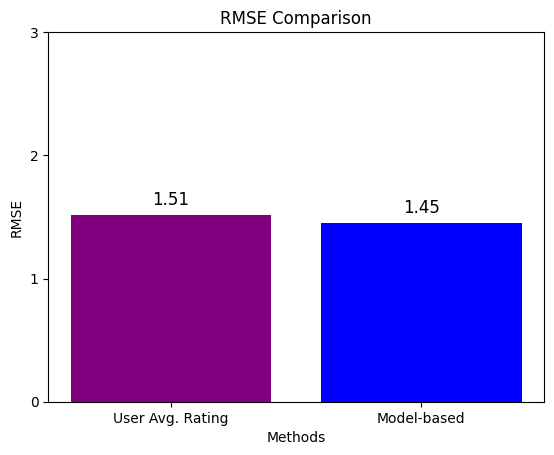

In [67]:
# RMSE Ï∞®Ïù¥ ÏãúÍ∞ÅÌôî

# RMSE values
rmse_values = [avg_RMSE, model_RMSE]

# Labels for each method
methods = ["User Avg. Rating", "Model-based"]

# Create a bar plot
plt.bar(methods, rmse_values, color=['purple', 'blue'])
plt.xlabel("Methods")
plt.ylabel("RMSE")
plt.title("RMSE Comparison")

# Set the y-axis scale to specific intervals
plt.yticks([0, 1, 2, 3])

# Display the RMSE values on top of the bars
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

In [68]:
# User-ID = 254.0 , Book-ID = 52 Ïù∏ Í≤ΩÏö∞Ïùò score Ï∂úÎ†•Ìï¥Î≥¥Í∏∞
score = user_book_score(254.0, 52)
print('score (User {}, Book {}) is '.format(254.0, 52) , score)

score (User 254.0, Book 52) is  8.486239324172299


In [ ]:
Rating_avg = Rating_avg.astype({'Book-ID': str})
Book_user = Rating_avg.groupby(by = 'User-ID')['Book-ID'].apply(lambda x:','.join(x))

In [ ]:
def User_based_book_recom(user):
    Book_seen_by_user = ratings_matrix.columns[ratings_matrix[ratings_matrix.index == user].notna().any()].tolist()
    a = sim_user_15_u[sim_user_15_u.index == user].values
    b = a.squeeze().tolist()
    d = Book_user[Book_user.index.isin(b)]
    I = ','.join(d.values)
    Book_seen_by_similar_users =  I.split(',')
    Book_under_consideration = list(set(Book_seen_by_similar_users)-set(list(map(str, Book_seen_by_user))))
    Book_under_consideration = list(map(int, Book_under_consideration))
    score = []
    for book in Book_under_consideration:
        c = final_book.loc[:,book]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['User-ID'] == user, 'Book-Rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_between_users.loc[user, index]
        fin = pd.concat([f,corr], axis=1)
        fin.columns = ['adg_score', 'correlation']
        fin['score'] = fin.apply(lambda x:x['adg_score'] * x['correlation'], axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'Book-ID': Book_under_consideration, 'score': score})
    top_5_recommendation = data.sort_values(by='score', ascending=False).head(5)
    Book_Name_with_Score = top_5_recommendation.merge(book_value, how='inner', on='Book-ID')
    Book_Names = Book_Name_with_Score['Book-Title'].values.tolist()
    return Book_Names, Book_Name_with_Score

In [ ]:
# Í¥ÄÏã¨ÏûàÎäî Ïú†Ï†ÄÍ∞Ä ÎÜíÍ≤å ÌèâÍ∞ÄÌïú Ï±Ö 5Í∞úÎßå Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
def users_choice(id):
    users_fav=common_books[common_books["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:5]
    return users_fav

Enter the User-ID to whom you want to recommend(if you don't mind press 0) : 266865.0
üü¶ USER: 266865.0 
 
[User's Favorite Books] :
Fast Food Nation: The Dark Side of the All-American Meal
Cold Mountain : A Novel
Brave New World
The Catcher in the Rye
White Oleander : A Novel (Oprah's Book Club)
 
[Recommended Books] : 
The Two Towers (The Lord of the Rings, Part 2)
I Know This Much Is True
Seabiscuit: An American Legend
The Red Tent (Bestselling Backlist)
Four To Score (A Stephanie Plum Novel)


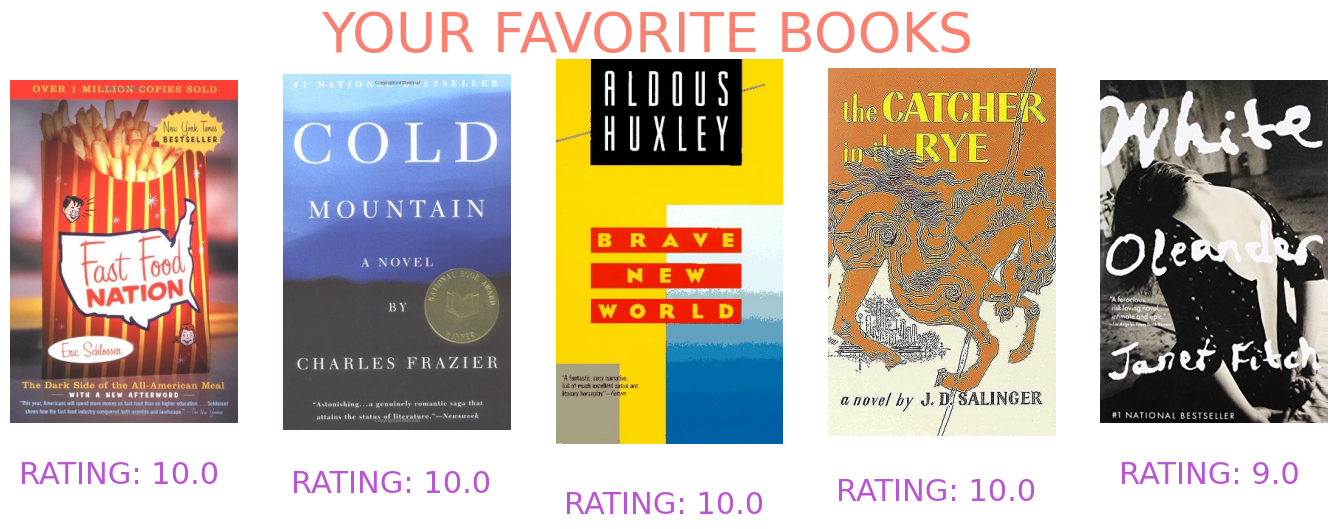

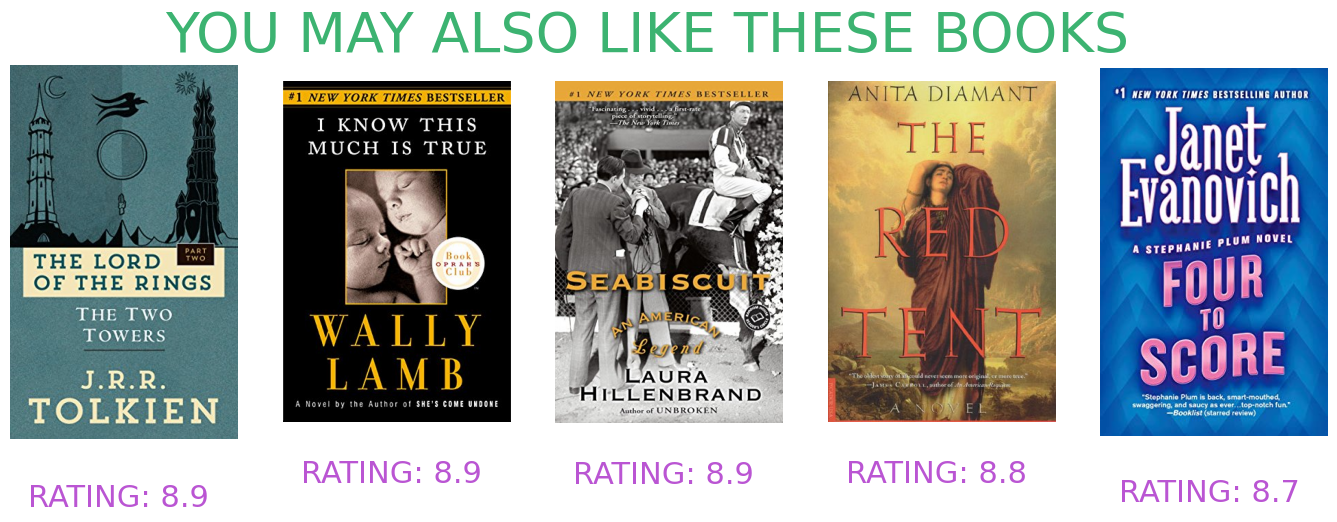

In [ ]:
# Í¥ÄÏã¨ ÏûàÎäî Ïú†Ï†ÄÏùò id Î∞õÍ∏∞
while(True):
    user = float(input("Enter the User-ID to whom you want to recommend(if you don't mind press 0) : "))
    if user == 0:
        user=random.choice(common_books["User-ID"].values)
        break
    elif common_books["User-ID"].isin([user]).any():
        break
    else:
        print("invalid user-id")

# Ïú†Ï†ÄÍ∞Ä Ï¢ãÏïÑÌïú Ï±ÖÍ≥º Î≥ÑÏ†ê ÏãúÍ∞ÅÌôî
user_favorite_df = users_choice(user)
n = len(user_favorite_df["Book-Title"].values)
print("üü¶ USER: {} ".format(user))
print(" ")
print("[User's Favorite Books] :")
for i in range(n):
  print(user_favorite_df["Book-Title"].values.tolist()[i])

fig,ax=plt.subplots(1,n,figsize=(17,5))
fig.suptitle("YOUR FAVORITE BOOKS",fontsize=40,color="salmon")

for i in range(n):
    url=common_books.loc[common_books["Book-Title"]==user_favorite_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    response = requests.get(url, stream=True, headers=headers)
    if response.status_code == 200:
        img = Image.open(io.BytesIO(response.content))
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(user_favorite_df["Book-Rating"].values[i]),y=-0.20,color="mediumorchid",fontsize=22)
        fig.show()
    else:
        print("Failed to retrieve image from URL:", url)
        print(response.status_code)

# ÏûÖÎ†•Ìïú Ïú†Ï†ÄÍ∞Ä Í¥ÄÏã¨ÏûàÏñ¥Ìï†ÎßåÌïú Ï±Ö 5Í∞ú Ï∂úÎ†•
predicted_books, books_with_score = User_based_book_recom(user)
print(" ")
print("[Recommended Books] : ")
for i in predicted_books:
    print(i)

# ÏãúÍ∞ÅÌôî
fig,ax=plt.subplots(1,5,figsize=(17,5))
fig.suptitle("YOU MAY ALSO LIKE THESE BOOKS",fontsize=40,color="mediumseagreen")

for i in range(len(predicted_books)):
    url=common_books.loc[common_books["Book-Title"]==books_with_score["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    response = requests.get(url, stream=True, headers=headers)
    if response.status_code == 200:
        img = Image.open(io.BytesIO(response.content))
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(books_with_score["score"].values[i], 1)),y=-0.20,color="mediumorchid",fontsize=22)
        fig.show()
    else:
        print("Failed to retrieve image from URL:", url)
        print(response.status_code)

# User-based Ver.2

### Îëê Î≤àÏß∏ User-based collaborative filteringÏùÄ Pearson correlation coefficientÎ•º ÏÇ¨Ïö©Ìïú Î∞©Î≤ïÏù¥Îã§.

In [ ]:
#user_book datasetÏùÑ ÎßåÎì§Ïûê!
user_book_df = common_books.pivot_table(index=['User-ID'],
                                        columns=['Book-Title'],
                                        values='Book-Rating')

In [ ]:
#ÎûúÎç§ÏúºÎ°ú Ïú†Ï†ÄÎ•º ÏÑ†ÌÉùÌïòÏûê
random_user = 136382

In [ ]:
random_user_df = user_book_df[user_book_df.index == random_user]
random_user_df

Book-Title  1984  1st to Die: A Novel  2nd Chance  A Bend in the Road  \
User-ID                                                                 
136382.0     NaN                  8.0         NaN                 NaN   

Book-Title  A Child Called \It\": One Child's Courage to Survive"  \
User-ID                                                             
136382.0                                                  NaN       

Book-Title  A Heartbreaking Work of Staggering Genius  \
User-ID                                                 
136382.0                                          NaN   

Book-Title  A Is for Alibi (Kinsey Millhone Mysteries (Paperback))  \
User-ID                                                              
136382.0                                                  5.0        

Book-Title  A Map of the World  A Painted House  A Prayer for Owen Meany  ...  \
User-ID                                                                   ...   
136382.0                   NaN              NaN                      NaN  ...   

Book-Title  Watership Down  We Were the Mulvaneys  When the Wind Blows  \
User-ID                                                                  
136382.0               NaN                    NaN                  NaN   

Book-Title  Where the Heart Is (Oprah's Book Club (Paperback))  \
User-ID                                                          
136382.0                                                  NaN    

Book-Title  While I Was Gone  White Oleander : A Novel  \
User-ID                                                  
136382.0                 NaN                       NaN   

Book-Title  White Oleander : A Novel (Oprah's Book Club)  \
User-ID                                                    
136382.0                                             NaN   

Book-Title  Wicked: The Life and Times of the Wicked Witch of the West  \
User-ID                                                                  
136382.0                                                  NaN            

Book-Title  Wild Animus  \O\" Is for Outlaw"  
User-ID                                       
136382.0            NaN                  NaN  

[1 rows x 200 columns]

In [ ]:
# our aim is to find the books that random user has rated
books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

['1st to Die: A Novel',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'Back Roads',
 'Dreamcatcher',
 'Four To Score (A Stephanie Plum Novel)',
 'Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)',
 'Midwives: A Novel',
 'Seven Up (A Stephanie Plum Novel)',
 'Skipping Christmas',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'The Poisonwood Bible: A Novel',
 'The Rainmaker',
 'The Rescue',
 'The Runaway Jury',
 'The Street Lawyer']

In [ ]:
len(books_read)

15

In [ ]:
# with random user, those who rate the same books are listed

books_read_df = user_book_df[books_read]
books_read_df

Book-Title  1st to Die: A Novel  \
User-ID                           
254.0                       NaN   
638.0                       NaN   
2766.0                      NaN   
4017.0                      NaN   
6242.0                      NaN   
...                         ...   
274004.0                    NaN   
274301.0                    NaN   
276050.0                    NaN   
276165.0                    NaN   
276231.0                    NaN   

Book-Title  A Is for Alibi (Kinsey Millhone Mysteries (Paperback))  \
User-ID                                                              
254.0                                                     NaN        
638.0                                                     NaN        
2766.0                                                    7.0        
4017.0                                                    NaN        
6242.0                                                    NaN        
...                                                       ...        
274004.0                                                  NaN        
274301.0                                                 10.0        
276050.0                                                  7.0        
276165.0                                                  NaN        
276231.0                                                  NaN        

Book-Title  Back Roads  Dreamcatcher  Four To Score (A Stephanie Plum Novel)  \
User-ID                                                                        
254.0              NaN           NaN                                     NaN   
638.0              NaN           NaN                                     NaN   
2766.0             NaN           NaN                                     NaN   
4017.0             NaN           NaN                                     NaN   
6242.0             NaN           NaN                                     NaN   
...                ...           ...                                     ...   
274004.0           NaN           NaN                                     NaN   
274301.0           NaN           NaN                                     NaN   
276050.0           NaN           NaN                                     NaN   
276165.0           NaN           NaN                                     NaN   
276231.0           NaN           NaN                                     NaN   

Book-Title  Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)  \
User-ID                                                                    
254.0                                                     NaN              
638.0                                                     NaN              
2766.0                                                    NaN              
4017.0                                                    NaN              
6242.0                                                    NaN              
...                                                       ...              
274004.0                                                  NaN              
274301.0                                                  NaN              
276050.0                                                  NaN              
276165.0                                                  NaN              
276231.0                                                  NaN              

Book-Title  Midwives: A Novel  Seven Up (A Stephanie Plum Novel)  \
User-ID                                                            
254.0                     NaN                                NaN   
638.0                     NaN                                NaN   
2766.0                    NaN                                NaN   
4017.0                    NaN                                NaN   
6242.0                    NaN                                NaN   
...                       ...                                ...   
274004.0                  NaN                              

In [ ]:
# determine how many books each user rating

user_book_count = books_read_df.T.notnull().sum()
user_book_count

User-ID
254.0       1
638.0       2
2766.0      2
4017.0      0
6242.0      0
           ..
274004.0    0
274301.0    1
276050.0    2
276165.0    0
276231.0    0
Length: 434, dtype: int64

In [ ]:
#  organizing the data set

user_book_count = user_book_count.reset_index()
user_book_count.columns = ["User_id", "book_count"]
user_book_count.sort_values("book_count", ascending=False)

User_id  book_count
209  136382.0          15
19    11676.0          13
25    16795.0          10
161  104636.0           8
399  258534.0           6
..        ...         ...
310  207782.0           0
121   85426.0           0
312  208671.0           0
118   81318.0           0
433  276231.0           0

[434 rows x 2 columns]

In [ ]:
# at least 5 people commenting on the same books with random user

users_same_book = user_book_count[user_book_count["book_count"] > 5]["User_id"]
users_same_book

19      11676.0
25      16795.0
161    104636.0
209    136382.0
399    258534.0
Name: User_id, dtype: float64

In [ ]:
# Determining the Users with the Most Similar Behavior with the User to Make a Recommendation
# merged data of other users with the random user

final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_book)],
                      random_user_df[books_read]])

In [ ]:
# correlations for all users .
# organizing the data set

corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
top_users = corr_df[(corr_df["user_id_1"] == random_user)][["user_id_2", "corr"]].reset_index(drop=True)

top_users

user_id_2      corr
0   258534.0 -0.241191
1    16795.0  0.750373
2   136382.0  1.000000

In [ ]:
# other users with 60% positive correlation with random user

top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >  0.60)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
top_users

User-ID      corr
1  136382.0  1.000000
0   16795.0  0.750373

In [ ]:
top_users_ratings = top_users.merge(ratings[["User-ID", "ISBN", "Book-Rating"]], how='inner')
top_users_ratings = top_users_ratings[top_users_ratings["User-ID"] != random_user]

top_users_ratings

User-ID      corr          ISBN  Book-Rating
437   16795.0  0.750373   0006093090X            8
438   16795.0  0.750373  000670891576            8
439   16795.0  0.750373    0020280505            8
440   16795.0  0.750373    0020419805            8
441   16795.0  0.750373    002517990X            6
...       ...       ...           ...          ...
3380  16795.0  0.750373    1890627062            0
3381  16795.0  0.750373    1930408048            0
3382  16795.0  0.750373    1930722028            0
3383  16795.0  0.750373    9994438859            0
3384  16795.0  0.750373    O451203771            0

[2948 rows x 4 columns]

In [ ]:
# with correlation we combine the effect of the rating
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['Book-Rating']

top_users_ratings

User-ID      corr          ISBN  Book-Rating  weighted_rating
437   16795.0  0.750373   0006093090X            8         6.002985
438   16795.0  0.750373  000670891576            8         6.002985
439   16795.0  0.750373    0020280505            8         6.002985
440   16795.0  0.750373    0020419805            8         6.002985
441   16795.0  0.750373    002517990X            6         4.502239
...       ...       ...           ...          ...              ...
3380  16795.0  0.750373    1890627062            0         0.000000
3381  16795.0  0.750373    1930408048            0         0.000000
3382  16795.0  0.750373    1930722028            0         0.000000
3383  16795.0  0.750373    9994438859            0         0.000000
3384  16795.0  0.750373    O451203771            0         0.000000

[2948 rows x 5 columns]

In [ ]:
recommendation_df = top_users_ratings.groupby('ISBN').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df

ISBN  weighted_rating
0      0006093090X         6.002985
1     000670891576         6.002985
2       0020280505         6.002985
3       0020419805         6.002985
4       002517990X         4.502239
...            ...              ...
2943    1890627062         0.000000
2944    1930408048         0.000000
2945    1930722028         0.000000
2946    9994438859         0.000000
2947    O451203771         0.000000

[2948 rows x 2 columns]

In [ ]:
# We list the top 10 with a weighted_rating greater than 6.5
books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 6.5].sort_values("weighted_rating", ascending=False).head(10)

books_to_be_recommend

ISBN  weighted_rating
1624  0515120898         7.503732
1669  0525945210         7.503732
558   0345423097         7.503732
2653  0866852611         7.503732
1623  051511992X         7.503732
811   0375412824         7.503732
1607  0515102636         7.503732
2521  0811801802         7.503732
2506  0805061762         7.503732
2195  0684842327         7.503732

In [ ]:
# we merge with df to see the name of the books
# random_user = 136382

books_to_be_recommend.merge(books_data[["ISBN", "Book-Title"]]).drop_duplicates()

ISBN  weighted_rating  \
0    0515120898         7.503732   
69   0525945210         7.503732   
103  0345423097         7.503732   
151  0866852611         7.503732   
152  051511992X         7.503732   
253  0375412824         7.503732   
373  0515102636         7.503732   
433  0811801802         7.503732   
486  0805061762         7.503732   
499  0684842327         7.503732   

                                            Book-Title  
0                                 The Pull of the Moon  
69   A Man Named Dave: A Story of Triumph and Forgi...  
103            Joy School (Ballantine Reader's Circle)  
151                                Love Story (Arabic)  
152                                 That Camden Summer  
253         The Dive From Clausen's Pier (Alex Awards)  
373                                      Morning Glory  
433  Sabine's Notebook: In Which the Extraordinary ...  
486  A Gentle Madness : Bibliophiles, Bibliomanes, ...  
499     NEEDLES : A MEMOIR OF GROWING UP WITH DIABETES

# Item-based Collaborative Filtering

In [ ]:
df=books_data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head()

Book-Title           Book-Author              Publisher  \
1  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
3  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
5  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
8  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
9  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   

                                         Image-URL-L   User-ID  Book-Rating  
1  http://images.amazon.com/images/P/0002005018.0...       8.0          5.0  
3  http://images.amazon.com/images/P/0002005018.0...   11676.0          8.0  
5  http://images.amazon.com/images/P/0002005018.0...   67544.0          8.0  
8  http://images.amazon.com/images/P/0002005018.0...  116866.0          9.0  
9  http://images.amazon.com/images/P/0002005018.0...  123629.0          9.0

In [ ]:
def item_based(bookTitle):
    bookTitle = str(bookTitle)

    if bookTitle in df["Book-Title"].values:
        rating_count = pd.DataFrame(df["Book-Title"].value_counts())
        rare_books = rating_count[rating_count["Book-Title"] <= 200].index
        common_books = df[~df["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
            # Í∞ÄÏû• Ïù∏Í∏∞ ÏûàÎäî Ï±Ö 5Í∂åÏùÑ Ï∂îÏ≤úÌï©ÎãàÎã§.
            most_popular = df["Book-Title"].value_counts().index[:5]
            print("Ïù¥ Ï±ÖÏóê ÎåÄÌïú Ï∂îÏ≤úÏù¥ ÏóÜÏäµÎãàÎã§.\n")
            print("Í∞ÄÏû• Ïù∏Í∏∞ ÏûàÎäî Ï±Ö 5Í∂åÏùÑ ÏãúÎèÑÌï¥ Î≥º Ïàò ÏûàÏäµÎãàÎã§: \n")
            for i, title in enumerate(most_popular, start=1):
                print("{}. {}".format(i, title))
        else:
            common_books_pivot = common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
            title = common_books_pivot[bookTitle]

            # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
            similarities = cosine_similarity(common_books_pivot.T.fillna(0))
            similar_scores = pd.Series(similarities[title.index.get_loc(bookTitle)])

            recommendation_df = pd.DataFrame({'Book-Title': title.index, 'Cosine-Similarity': similar_scores})
            recommendation_df = recommendation_df.sort_values(by='Cosine-Similarity', ascending=False)

            # ÌòÑÏû¨ Ï±ÖÏùÑ Ï∂îÏ≤úÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.
            recommendation_df = recommendation_df[recommendation_df['Book-Title'] != bookTitle]

            less_rating = []
            for i in recommendation_df["Book-Title"]:
                if df[df["Book-Title"] == i]["Book-Rating"].mean() < 5:
                    less_rating.append(i)
            if recommendation_df.shape[0] - len(less_rating) > 5:
                recommendation_df = recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]

            recommendation_df = recommendation_df.head


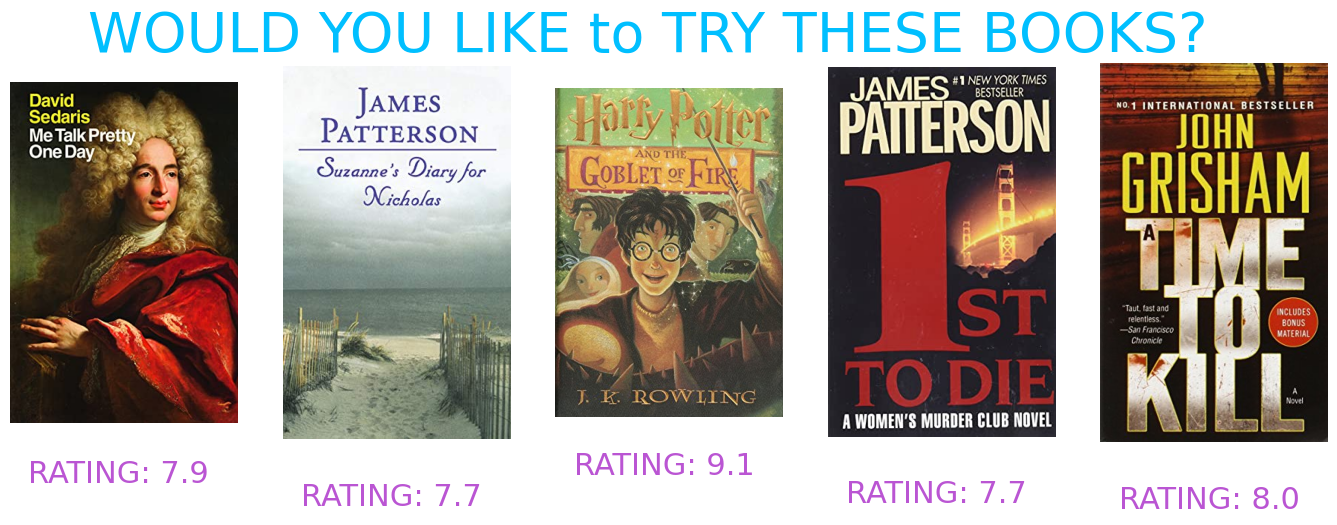

In [ ]:
#ÏÑ†ÌÉùÌïú Ï±ÖÎì§Í≥º Ïú†ÏÇ¨Ìïú Ï±ÖÎì§ Ï∂îÏ≤ú
item_based("The Chamber")